#  <center>Keras<center>

### Keras模型
- Keras有两种类型的模型，顺序模型（Sequential）和泛型模型（Model）

- model.summary()：打印出模型概况
- model.get_config():返回包含模型配置信息的Python字典。模型也可以从它的config信息中重构回去

- 序贯（Sequential）模型

- 泛型模型（Model）

### Keras的泛型模型为Model，即广义的拥有输入和输出的模型，我们使用Model来初始化一个泛型模型
- 常用Model属性
- model.layers：组成模型图的各个层
- model.inputs：模型的输入张量列表
- model.outputs：模型的输出张量列表

verbose = 0 不在标准输出流输出日志信息
verbose = 1 输出进度条记录，进度条如 [====>…] - ETA
verbose = 2 每个epoch输出一行记录

In [24]:
import numpy as np
import keras
from keras.layers import Permute, Embedding

### <center>数据初始化</center>

In [9]:
# 固定随机数种子以复现结果
seed=13
np.random.seed(seed)

In [10]:
data_1d = np.random.normal(size=25)
data_1d.shape

(25,)

In [11]:
data_2d = np.expand_dims(data_1d, 0) 
data_2d.shape

(1, 25)

In [12]:
data_3d = np.expand_dims(data_2d, 2)
data_3d.shape

(1, 25, 1)

In [13]:
data_3d

array([[[-0.71239066],
        [ 0.75376638],
        [-0.04450308],
        [ 0.45181234],
        [ 1.34510171],
        [ 0.53233789],
        [ 1.3501879 ],
        [ 0.86121137],
        [ 1.47868574],
        [-1.04537713],
        [-0.78898902],
        [-1.26160595],
        [ 0.56284679],
        [-0.24332625],
        [ 0.9137407 ],
        [ 0.31735092],
        [ 0.12730328],
        [ 2.15038297],
        [ 0.60628866],
        [-0.02677165],
        [-0.98416078],
        [ 1.19070527],
        [ 0.95283061],
        [-1.08718159],
        [-0.14521133]]])

In [57]:
"""
low、high、size三个参数。
默认high是None,如果只有low，那范围就是[0,low)。
如果有high，范围就是[low,high)。
size = (sample_num, fea_num)
"""
input_array = np.random.randint(1000, size=(32, 10))
input_array.shape

(32, 10)

In [51]:
np.random.randint(1000,1002, size=(32, 10))

array([[1001, 1001, 1000, 1001, 1000, 1001, 1001, 1001, 1001, 1000],
       [1000, 1000, 1001, 1000, 1000, 1001, 1001, 1000, 1001, 1001],
       [1001, 1001, 1000, 1000, 1001, 1001, 1001, 1001, 1001, 1001],
       [1001, 1001, 1001, 1000, 1001, 1001, 1001, 1000, 1000, 1000],
       [1000, 1000, 1001, 1001, 1001, 1000, 1001, 1001, 1000, 1000],
       [1001, 1000, 1000, 1001, 1000, 1000, 1001, 1001, 1000, 1000],
       [1000, 1000, 1001, 1001, 1000, 1000, 1001, 1000, 1000, 1001],
       [1001, 1001, 1000, 1000, 1001, 1000, 1000, 1000, 1001, 1001],
       [1001, 1001, 1001, 1000, 1000, 1000, 1000, 1000, 1001, 1001],
       [1000, 1000, 1001, 1001, 1000, 1001, 1000, 1001, 1001, 1000],
       [1001, 1000, 1001, 1000, 1001, 1000, 1001, 1001, 1001, 1001],
       [1001, 1000, 1001, 1001, 1000, 1000, 1000, 1000, 1000, 1001],
       [1001, 1001, 1000, 1001, 1000, 1001, 1000, 1001, 1001, 1001],
       [1000, 1001, 1000, 1000, 1000, 1000, 1001, 1000, 1000, 1000],
       [1000, 1000, 1001, 1000, 10

In [ ]:
def get_data_recurrent(n, time_steps, input_dim, attention_column=10):
    """
    获取时间序列数据-3D
    Data generation. x is purely random except that it's first value equals the target y.
    In practice, the network should learn that the target = x[attention_column].
    Therefore, most of its attention should be focused on the value addressed by attention_column.
    :param n: the number of samples to retrieve.
    :param time_steps: the number of time steps of your series.
    :param input_dim: the number of dimensions of each element in the series.
    :param attention_column: the column linked to the target. Everything else is purely random.
    :return: x: model inputs, y: model targets
    """
    x = np.random.standard_normal(size=(n, time_steps, input_dim))
    y = np.random.randint(low=0, high=2, size=(n, 1))
    x[:, attention_column, :] = np.tile(y[:], (1, input_dim))
    return x, y

def get_data_for_attention(n, input_dim, attention_column=1):
    """
    2D
    Data generation. x is purely random except that it's first value equals the target y.
    In practice, the network should learn that the target = x[attention_column].
    Therefore, most of its attention should be focused on the value addressed by attention_column.
    :param n: the number of samples to retrieve.
    :param input_dim: the number of dimensions of each element in the series.
    :param attention_column: the column linked to the target. Everything else is purely random.
    :return: x: model inputs, y: model targets
    """
    x = np.random.standard_normal(size=(n, input_dim))
    y = np.random.randint(low=0, high=2, size=(n, 1))
    # 将y的column_0赋值给x_attention_column
    x[:, attention_column] = y[:, 0]
    return x, y

In [59]:
N = 300
TIME_STEPS = 20
INPUT_DIM = 2
inputs_1, outputs = get_data_recurrent(N, TIME_STEPS, INPUT_DIM)

In [60]:
inputs_1.shape

(300, 20, 2)

In [61]:
outputs.shape

(300, 1)

In [62]:
import tensorflow as tf
# ndarray --> tensor
inputs_1_tensor = tf.convert_to_tensor(inputs_1)
inputs_1_tensor

<tf.Tensor 'Const_2:0' shape=(300, 20, 2) dtype=float64>

In [63]:
a = Permute((2, 1))(inputs_1_tensor) # a shape(300,2,20)
a

<tf.Tensor 'permute_2/transpose:0' shape=(300, 2, 20) dtype=float64>

### <center>CONV-卷积<center>

- Conv1D 输入3-D数组 输出2-D数组
- Conv2D 输入4-D数组 输出3-D数组

In [26]:
"""
定义卷积层  
参数个数 = kernel_size + 1 (activation)
input_size: 25
“valid”代表只进行有效的卷积，即对边界数据不处理
            output_size: 25-kernel_size+1
"same"/"causal": output_size = input_size
"""
filters = 1 # 卷积核数量为 1
kernel_size = 5 # 卷积核大小为 5
convolution_1d_layer = keras.layers.convolutional.Conv1D(filters,
                                                         kernel_size,
                                                         strides=1,
                                                         padding='causal', #
                                                         input_shape=(25, 1),
                                                         activation="relu",
                                                         name="convolution_1d_layer")

In [27]:
# 定义最大化池化层
max_pooling_layer = keras.layers.MaxPool1D(pool_size=5,
                                           strides=1,
                                           padding="valid",
                                           name="max_pooling_layer")

In [28]:
# 平铺层，调整维度适应全链接层
reshape_layer = keras.layers.core.Flatten(name="reshape_layer")

In [29]:
# 定义全链接层
full_connect_layer = keras.layers.Dense(5,
                                        kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=seed),
                                        bias_initializer="random_normal",
                                        use_bias=True,
                                        name="full_connect_layer")

In [30]:
# 编译模型
model = keras.Sequential()
model.add(convolution_1d_layer)
model.add(max_pooling_layer)
model.add(reshape_layer)
model.add(full_connect_layer)

In [31]:
# 打印 full_connect_layer 层的输出
output = keras.Model(inputs=model.input, outputs=model.get_layer('full_connect_layer').output).predict(data_3d)

In [32]:
output.shape

(1, 5)

In [21]:
data_3d.shape

(1, 25, 1)

In [28]:
output

array([[ 0.4945412 ,  0.1851331 , -0.1249821 ,  0.22180727,  0.5340365 ]],
      dtype=float32)

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1d_layer (Conv1D (None, 25, 1)             6         
_________________________________________________________________
max_pooling_layer (MaxPoolin (None, 21, 1)             0         
_________________________________________________________________
reshape_layer (Flatten)      (None, 21)                0         
_________________________________________________________________
full_connect_layer (Dense)   (None, 5)                 110       
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


### <center>Embedding Layer<center>
一个Embedding层的输入应该是一系列的整数序列
所有的序列中的整数都将被对应的词向量矩阵中对应的列（也就是它的词向量）代替,比如序列[1,2]将被序列[词向量[1],词向量[2]]代替。
这样，输入一个2D张量后，我们可以得到一个3D张量。

参数：
- input_dim：大或等于0的整数，字典长度，即输入数据最大下标+1
- output_dim：大于0的整数，代表全连接嵌入的维度
- input_length：当输入序列的长度固定时，该值为其长度。如果要在该层后接Flatten层，然后接Dense层，则必须指定该参数，否则Dense层的输出维度无法自动推断。
- https://blog.csdn.net/jiangpeng59/article/details/77533309
- 如果输入数据不需要词的语义特征语义，简单使用Embedding层就可以得到一个对应的词向量矩阵，
- 如果需要语义特征，我们大可把以及训练好的词向量权重直接扔到Embedding层中即可

mask_zero: 
- (1)是否把 0 看作为一个应该被遮蔽的特殊的 "padding" 值。 这对于可变长的 循环神经网络层 十分有用。 
- (2)如果设定为 True，那么接下来的所有层都必须支持 masking，否则就会抛出异常。 
- (3)如果 mask_zero 为 True，作为结果，索引 0 就不能被用于词汇表中 （input_dim 应该与 vocabulary + 1 大小相同）。

In [37]:
model1 = keras.Sequential()
model1.add(Embedding(input_dim=1000, output_dim=64, input_length=10))

In [38]:
input_array = np.random.randint(1000, size=(32, 10)) # 32个样本，每个样本10个time-step

In [39]:
model1.compile('rmsprop', 'mse')
output_array = model1.predict(input_array)  # input_array = (32, 10) / 每个值得范围为[0,1000)

In [42]:
output_array.shape

(32, 10, 64)

In [65]:
# embedding_layer = Embedding(len(word_index) + 1,
#                             EMBEDDING_DIM,
#                             weights=[embedding_matrix],  # 词向量矩阵
#                             input_length=MAX_SEQUENCE_LENGTH,
#                             trainable=False)

### <center>多输入多输出<center>
- loss_weight:用来计算总的loss 的权重。默认为1，多个输出时，可以设置不同输出loss的权重来决定训练过程。

In [9]:
from keras.layers import Input
from keras.layers import concatenate, Dense
from keras.utils import to_categorical
from keras.models import Model

x_in = Input(shape=(100,), name='x_in')
y_in = Input(shape=(100,), name='y_in')
# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(x_in)  # 64*101
y = Dense(64, activation='relu')(y_in)
z = concatenate([x, y])

x = Dense(1, activation='sigmoid', name='x_out')(z)
y = Dense(10, activation='softmax', name='y_out')(z)

model = Model(inputs=[x_in, y_in], outputs=[x, y])
model.compile(optimizer='rmsprop',
              loss={'x_out': 'binary_crossentropy', 
                    'y_out': 'categorical_crossentropy'},
              loss_weights={'x_out': 1., 'y_out': 0.2})



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               (None, 100)          0                                            
__________________________________________________________________________________________________
y_in (InputLayer)               (None, 100)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           6464        x_in[0][0]                       
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           6464        y_in[0][0]                       
__________________________________________________________________________________________________
concatenat

In [11]:
"""data for training"""
import numpy as np
from keras.models import Model
data = np.random.random((1000, 100))
xs = np.random.randint(2, size=(1000, 1))
ys = np.random.randint(10, size=(1000, 1))
# xs
data

array([[0.63306315, 0.6472018 , 0.30335145, ..., 0.09281536, 0.17480713,
        0.65033905],
       [0.85882121, 0.77461259, 0.25038101, ..., 0.51059238, 0.48645597,
        0.84684669],
       [0.11843133, 0.30173383, 0.39898592, ..., 0.86672458, 0.08558629,
        0.6278311 ],
       ...,
       [0.05403877, 0.13152411, 0.35730517, ..., 0.20179248, 0.50769787,
        0.79723887],
       [0.0848092 , 0.53969324, 0.17883817, ..., 0.60985375, 0.74907213,
        0.86871299],
       [0.85370718, 0.92634633, 0.59901838, ..., 0.1517482 , 0.17036782,
        0.00807305]])

In [20]:
# And trained it via:
history = model.fit({'x_in': data, 'y_in': data},
                      {'x_out': xs, 'y_out': to_categorical(ys)},
                      epochs=10, 
                    batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 45us/step - loss: 0.9847 - x_out_loss: 0.5722 - y_out_loss: 2.0627
Epoch 2/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.9745 - x_out_loss: 0.5649 - y_out_loss: 2.0481
Epoch 3/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.9612 - x_out_loss: 0.5543 - y_out_loss: 2.0344
Epoch 4/10
1000/1000 [==============================] - 0s 43us/step - loss: 0.9500 - x_out_loss: 0.5451 - y_out_loss: 2.0245
Epoch 5/10
1000/1000 [==============================] - 0s 40us/step - loss: 0.9435 - x_out_loss: 0.5423 - y_out_loss: 2.0058
Epoch 6/10
1000/1000 [==============================] - 0s 41us/step - loss: 0.9337 - x_out_loss: 0.5333 - y_out_loss: 2.0021
Epoch 7/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.9197 - x_out_loss: 0.5224 - y_out_loss: 1.9862
Epoch 8/10
1000/1000 [==============================] - 0s 43us/step - loss: 0.9117 - x_out_loss: 0.5179 - y_out_loss:

### <center>训练可视化<center>

https://blog.csdn.net/m0_37477175/article/details/79131456

dict_keys(['loss', 'x_out_loss', 'y_out_loss'])


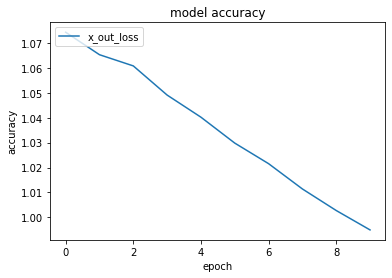

In [19]:
import matplotlib.pyplot as plt
def show_loss(history):
    print(history.history.keys())
    fig = plt.figure()
#     plt.plot(history.history['acc'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['x_out_loss'], loc='upper left')
#     fig.savefig('performance.png')
show_loss(history)

### <center>网络结构可视化<center>

- https://www.cnblogs.com/hutao722/p/9552246.html
- apt install graphviz

In [15]:
from keras.utils.vis_utils import plot_model
# 显示网络结构图
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

### 验证集
https://blog.csdn.net/grllery/article/details/83685306

### 样本不平衡问题

In [ ]:
# class_weight=None,

###### sample_weight=None,
- (1) 传入一维数组（长度与样本长度相同）
- (2) 传入(samples,seq_lenght)的2D数组，对于样本的每个时间步施加不同的权重

### <center>shardlayers 共享层<center>

In [75]:
from keras.layers import LSTM
tweet_a = Input(shape=(280, 256))
tweet_b = Input(shape=(280, 256))

# This layer can take as input a matrix
# and will return a vector of size 64
shared_lstm = LSTM(64)

# When we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)


# We can then concatenate the two vectors:
merged_vector = keras.layers.concatenate([encoded_a, encoded_b], axis=-1)

# And add a logistic regression on top
predictions = Dense(1, activation='sigmoid')(merged_vector)

# We define a trainable model linking the
# tweet inputs to the predictions
model = Model(inputs=[tweet_a, tweet_b], outputs=predictions)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 280, 256)     0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 280, 256)     0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 64)           82176       input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 128)          0           lstm_2[0][0]                     
          

In [77]:
input_dims = 256
inputs = Input(shape=(input_dims,))
attention_probs = Dense(input_dims, activation='softmax', name='attention_probs')(inputs)
attention_probs

<tf.Tensor 'attention_probs_1/Softmax:0' shape=(?, 256) dtype=float32>

In [79]:
from keras.layers import multiply
attention_mul = multiply([inputs, attention_probs])
print(attention_mul)

Tensor("multiply_1/mul:0", shape=(?, 256), dtype=float32)


### <center>多分类<center>

In [1]:
# generate 2d classification dataset
from sklearn.datasets.samples_generator import make_blobs

n_samples = 1100
X, y = make_blobs(n_samples=1100, centers=3, n_features=20, cluster_std=2, random_state=2)

In [2]:
# # 类别向量定义
# b = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# # 调用to_categorical将b按照9个类别来进行转换
# b = to_categorical(b, 9) # 离散
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
testX

NameError: name 'to_categorical' is not defined

In [91]:
from keras.models import Sequential
def MultiClassModel(feature_dim,label_dim):

    model = Sequential()
    print("create model. feature_dim = %s, label_dim = %s" % (feature_dim,label_dim))
    model.add(Dense(500, activation='relu', input_dim=feature_dim))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(label_dim, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
#     model.summary()
    return model

create model. feature_dim = 20, label_dim = 3
dict_keys(['loss', 'acc'])


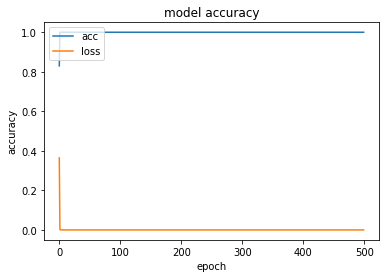

In [92]:
model = MultiClassModel(feature_dim=20,label_dim=3)

history = model.fit(trainX, trainy, epochs=500, verbose=0)
show_loss(history)

In [93]:
res = model.predict(testX[0:1])
res

array([[2.2919129e-09, 6.0182678e-08, 9.9999988e-01]], dtype=float32)

### <center>多标签分类<center>

In [94]:
from sklearn.datasets import make_multilabel_classification
"""
sparse（稀疏）:如果是True，返回一个稀疏矩阵，稀疏矩阵表示一个有大量零元素的矩阵。
n_labels:每个实例的标签的平均数量。
return_indicator:“sparse”在稀疏的二进制指示器格式中返回Y。
allow_unlabeled:如果是True，有些实例可能不属于任何类。
"""
X, y = make_multilabel_classification(n_samples=1100,
                                      n_features=20,
                                      n_classes=10,
                                      sparse=False,
                                      n_labels=20,
                                      # return_indicator='sparse',
                                      allow_unlabeled=False)

In [95]:
n_train = 1000
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [96]:
def MultiLabelModel(feature_dim,label_dim):

    model = Sequential()
    print("create model. feature_dim = %s, label_dim = %s" % (feature_dim,label_dim))
    model.add(Dense(500, activation='relu', input_dim=feature_dim))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(label_dim, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # plot_model(model, to_file='multi_label_model.png')
    return model

create model. feature_dim = 20, label_dim = 10
dict_keys(['loss', 'acc'])


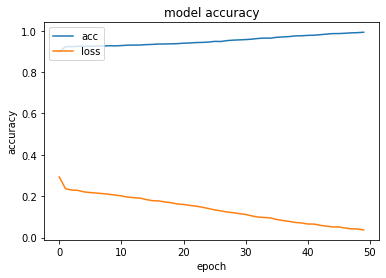

In [97]:
model = MultiLabelModel(feature_dim=20,label_dim=10)
history = model.fit(trainX, trainy, epochs=50, verbose=0)
show_loss(history)

In [98]:
res = model.predict(testX[0:1])
res

array([[0.905244  , 0.9582441 , 0.9937376 , 0.97656727, 0.995643  ,
        0.9627011 , 0.9950453 , 0.17916685, 0.99469215, 0.99998426]],
      dtype=float32)

### pad_sequence
keras只能接受长度相同的序列输入
- sequences：浮点数或整数构成的两层嵌套列表
- padding：‘pre’(默认)或‘post’，确定当需要补0时，在序列的起始还是结尾补`
- truncating：‘pre’(默认)或‘post’，确定当需要截断序列时，从起始还是结尾截断

In [5]:
import keras
list_1 = [[2,3,4,5,5,5,5,5,5,5,6,7,7,8,9]]
keras.preprocessing.sequence.pad_sequences(list_1, maxlen=10)

array([[5, 5, 5, 5, 5, 6, 7, 7, 8, 9]], dtype=int32)

### keras 分词器
Tokenizer是一个用于向量化文本，或将文本转换为序列（即单个字词以及对应下标构成的列表，从1算起）的类。

In [18]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
text = ["今天 北京 下 雨 了", "我 今天 加班"]
tokenizer.fit_on_texts(text)

In [21]:
tokenizer.word_counts  # 字典，将单词（字符串）映射为它们在训练期间出现的次数。仅在调用fit_on_texts之后设置。

OrderedDict([('今天', 2),
             ('北京', 1),
             ('下', 1),
             ('雨', 1),
             ('了', 1),
             ('我', 1),
             ('加班', 1)])

In [22]:
tokenizer.word_index

{'今天': 1, '北京': 2, '下': 3, '雨': 4, '了': 5, '我': 6, '加班': 7}

In [20]:
tokenizer.texts_to_sequences(["下 雨 我 加班"])

[[3, 4, 6, 7]]

In [ ]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],  # 词向量矩阵
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

### Lambda层
如果你只是想对流经该层的数据做个变换，而这个变换本身没有什么需要学习的参数，那么直接用Lambda Layer是最合适的了。

In [44]:
from keras import Input
from keras import backend as K
from keras.engine import Model
from keras.layers import Lambda
import numpy as np

In [49]:
a = Input(shape=(2,))
b = Input(shape=(2,))

def minus(inputs):
    x, y = inputs
    return K.mean(x - y)
    # return K.mean(x - y)

m = Lambda(minus, name='minus')([a, b])
model = Model(inputs=[a, b], outputs=[m])

v0 = np.array([1,2])
v1 = np.array([3,4])
v2 = np.array([5,6])
print(model.predict([v0.reshape(1,2), v2.reshape(1,2)]))
# print model.predict([v0.reshape(1,2), v2.reshape(1,2)])
# print model.predict([np.array([v0, v0]), np.array([v1, v2])])

[-4.]


###  math_ops

In [2]:
from keras import backend as K
import tensorflow as tf
import numpy as np

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
K.eval((K.round(0.1)))

0.0

In [64]:
# Element-wise rounding to the closest integer.
a = K.round(1.1)
K.eval(a)

1.0

In [6]:
K.eval(K.exp(1.0))

2.7182817

In [3]:
# 类型强转
K.eval(K.cast(0.6 < 0.5,float))  # Casts a tensor to a different dtype and returns it.

0.0

In [74]:
K.eval(K.cast(1.111,float))

1.111

In [78]:
# K.square Element-wise square.
K.eval(K.square([2.0,3.0]))

array([4., 9.], dtype=float32)

In [96]:
w = tf.random_uniform([10, 4], -1.0, 1.0)  # 10行4列
K.eval(w)

array([[-0.06705117,  0.64430547,  0.29060173,  0.58188677],
       [-0.5179398 ,  0.13260674, -0.15193391,  0.4822824 ],
       [ 0.4814093 , -0.52286386, -0.90174294,  0.8020973 ],
       [ 0.53363633,  0.7142024 , -0.1541214 , -0.06272984],
       [-0.11878419,  0.5902605 ,  0.47494268, -0.83123136],
       [ 0.9821813 , -0.19011045,  0.01317859,  0.4572072 ],
       [-0.28450084, -0.8345883 ,  0.4772606 , -0.2771411 ],
       [ 0.65320015, -0.4203143 ,  0.95294666,  0.47445607],
       [-0.24869919,  0.34794354, -0.52679753,  0.4517374 ],
       [ 0.9306984 ,  0.03719974,  0.4630351 ,  0.50380874]],
      dtype=float32)

In [93]:
K.eval(K.mean(w))

0.1346169

### callback
回调函数是一个函数的合集，会在训练的阶段中所使用。你可以使用回调函数来查看训练模型的内在状态和统计。
https://keras.io/zh/callbacks/

In [7]:
import math
math.pow(784,1/2)

28.0